In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
import sklearn
sklearn.__version__

'0.23.1'

In [3]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
# Save the input and target variables

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [5]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [7]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model

model = get_model()

In [8]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9560 - mae: 0.8351 - val_loss: 1.0973 - val_mae: 0.9026
Epoch 2/100
6/6 - 0s - loss: 0.8570 - mae: 0.7970 - val_loss: 0.8970 - val_mae: 0.8154
Epoch 3/100
6/6 - 0s - loss: 0.6574 - mae: 0.6931 - val_loss: 0.6209 - val_mae: 0.6663
Epoch 4/100
6/6 - 0s - loss: 0.5278 - mae: 0.5884 - val_loss: 0.5673 - val_mae: 0.6084
Epoch 5/100
6/6 - 0s - loss: 0.4796 - mae: 0.5449 - val_loss: 0.7260 - val_mae: 0.6943
Epoch 6/100
6/6 - 0s - loss: 0.4953 - mae: 0.5752 - val_loss: 0.6835 - val_mae: 0.6562
Epoch 7/100
6/6 - 0s - loss: 0.4940 - mae: 0.5693 - val_loss: 0.6103 - val_mae: 0.6292
Epoch 8/100
6/6 - 0s - loss: 0.4441 - mae: 0.5419 - val_loss: 0.5887 - val_mae: 0.6090
Epoch 9/100
6/6 - 0s - loss: 0.4298 - mae: 0.5224 - val_loss: 0.6066 - val_mae: 0.6257
Epoch 10/100
6/6 - 0s - loss: 0.4323 - mae: 0.5333 - val_loss: 0.5835 - val_mae: 0.5968
Epoch 11/100
6/6 - 0s - loss: 0.4165 - mae: 0.5088 - val_loss: 0.5735 - val_mae: 0.5839
Epoch 12/100
6/6 - 0s - loss: 0.4059 - ma

Epoch 95/100
6/6 - 0s - loss: 0.0380 - mae: 0.1361 - val_loss: 0.9310 - val_mae: 0.7134
Epoch 96/100
6/6 - 0s - loss: 0.0412 - mae: 0.1472 - val_loss: 0.8998 - val_mae: 0.7077
Epoch 97/100
6/6 - 0s - loss: 0.0342 - mae: 0.1287 - val_loss: 0.8640 - val_mae: 0.6927
Epoch 98/100
6/6 - 0s - loss: 0.0318 - mae: 0.1202 - val_loss: 0.9102 - val_mae: 0.7035
Epoch 99/100
6/6 - 0s - loss: 0.0305 - mae: 0.1187 - val_loss: 0.9265 - val_mae: 0.7188
Epoch 100/100
6/6 - 0s - loss: 0.0296 - mae: 0.1167 - val_loss: 0.9313 - val_mae: 0.7175


In [11]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.8558 - mae: 0.6682


[0.8557729721069336, 0.6682450175285339]

#### Plot the learning curves

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

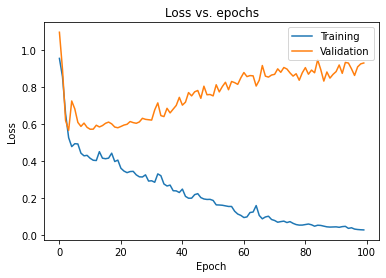

In [13]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [15]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    
    return model

In [16]:
# Re-build the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9797 - mae: 0.8420 - val_loss: 1.1651 - val_mae: 0.9227
Epoch 2/100
6/6 - 0s - loss: 0.9730 - mae: 0.8428 - val_loss: 1.1434 - val_mae: 0.9195
Epoch 3/100
6/6 - 0s - loss: 0.9394 - mae: 0.8310 - val_loss: 1.0721 - val_mae: 0.8956
Epoch 4/100
6/6 - 0s - loss: 0.8584 - mae: 0.8006 - val_loss: 0.9213 - val_mae: 0.8387
Epoch 5/100
6/6 - 0s - loss: 0.7301 - mae: 0.7334 - val_loss: 0.7540 - val_mae: 0.7607
Epoch 6/100
6/6 - 0s - loss: 0.6687 - mae: 0.6753 - val_loss: 0.6314 - val_mae: 0.6816
Epoch 7/100
6/6 - 0s - loss: 0.5805 - mae: 0.6096 - val_loss: 0.6448 - val_mae: 0.6699
Epoch 8/100
6/6 - 0s - loss: 0.5668 - mae: 0.6186 - val_loss: 0.6646 - val_mae: 0.6708
Epoch 9/100
6/6 - 0s - loss: 0.5656 - mae: 0.6263 - val_loss: 0.6837 - val_mae: 0.6788
Epoch 10/100
6/6 - 0s - loss: 0.5350 - mae: 0.5949 - val_loss: 0.6412 - val_mae: 0.6544
Epoch 11/100
6/6 - 0s - loss: 0.5227 - mae: 0.5772 - val_loss: 0.6476 - val_mae: 0.6528
Epoch 12/100
6/6 - 0s - loss: 0.5605 - ma

Epoch 95/100
6/6 - 0s - loss: 0.3723 - mae: 0.4783 - val_loss: 0.6148 - val_mae: 0.6159
Epoch 96/100
6/6 - 0s - loss: 0.3640 - mae: 0.4721 - val_loss: 0.6192 - val_mae: 0.6131
Epoch 97/100
6/6 - 0s - loss: 0.3545 - mae: 0.4717 - val_loss: 0.6238 - val_mae: 0.6085
Epoch 98/100
6/6 - 0s - loss: 0.3500 - mae: 0.4665 - val_loss: 0.6356 - val_mae: 0.6020
Epoch 99/100
6/6 - 0s - loss: 0.3586 - mae: 0.4635 - val_loss: 0.6314 - val_mae: 0.6277
Epoch 100/100
6/6 - 0s - loss: 0.3635 - mae: 0.4805 - val_loss: 0.6770 - val_mae: 0.6586


In [19]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7008 - mae: 0.6586


[0.7007976770401001, 0.6586042046546936]

#### Plot the learning curves

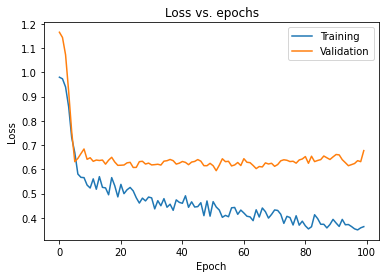

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [21]:
# Write a Custom Callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print('Starting Training...')
        
    def on_epoch_begin(selg, epoch, logs=None):
        print(f'Starting Epoch {epoch}')
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f'Training: Starting batch {batch}')
        
    def on_train_batch_end(self, batch, logs=None):
        print(f'Training Finished batch {batch}')
        
    def on_epoch_end(self, epoch, logs=None):
        print(f'Finished epoch {epoch}')
        
    def on_train_end(self, logs=None):
        print('Training Finished...')
        
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing!")
        
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished Prediction!")        

In [22]:
# Re-build the model

model = get_regularized_model(1e-5, 0.3)

In [23]:
# Compile the model

model.compile(optimizer='adam', loss='mae')

#### Train the model with the callback

In [24]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting Training...
Starting Epoch 0
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 0
Starting Epoch 1
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 1
Starting Epoch 2
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 2
Training Finished...


In [25]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing Starting batch 0
Testing Finished batch 0
Testing Starting batch 1
Testing Finished batch 1
Finished testing!


0.828568696975708

In [26]:
# Make predictions with the model

model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished Prediction!


array([[-0.06132456],
       [-0.06454326],
       [-0.0167629 ],
       [-0.03674473],
       [-0.05874375],
       [-0.05380329],
       [-0.01177161],
       [-0.01202501],
       [-0.03464665],
       [-0.03327987],
       [-0.02425654],
       [ 0.01034734],
       [-0.03901767],
       [-0.05561306],
       [-0.03433785],
       [-0.03741965],
       [-0.04796545],
       [-0.01195225],
       [-0.04975336],
       [-0.0617264 ],
       [-0.0558082 ],
       [-0.01506856],
       [-0.04556167],
       [-0.02616858],
       [-0.01319787],
       [-0.05832028],
       [-0.05407767],
       [-0.05065149],
       [-0.05891378],
       [-0.00909352],
       [ 0.0046022 ],
       [-0.04680128],
       [-0.06309102],
       [-0.04541387],
       [-0.01374566],
       [-0.0433149 ],
       [-0.01116496],
       [-0.0470164 ],
       [-0.02371226],
       [-0.05047219],
       [-0.03614172],
       [-0.06066593],
       [-0.007015  ],
       [-0.05353596],
       [-0.04465555]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [27]:
# Re-train the unregularised model



In [28]:
# Evaluate the model on the test set



In [29]:
# Re-train the regularised model



In [30]:
# Evaluate the model on the test set



#### Plot the learning curves

NameError: name 'unreg_history' is not defined

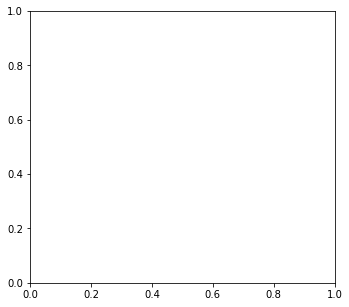

In [31]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()